# Section 1: Introduction to PCA and Quantum PCA (QPCA)

## Classical PCA – A Recap

**Principal Component Analysis (PCA)** is one of the most widely used techniques in classical machine learning and data preprocessing. It is primarily employed for:

- **Dimensionality Reduction**: Reducing the number of features while retaining the most important variance in the dataset.
- **Noise Reduction**: Removing less informative components.
- **Data Visualization**: Transforming high-dimensional data into 2D or 3D space for analysis.

The core idea of PCA is to find a new basis (i.e., principal components) such that:
- Each successive component captures the maximum possible variance.
- Components are orthogonal to each other.

### Mathematically:
Given a dataset represented by a matrix $X$, PCA computes the **covariance matrix**:


<center>$\Sigma = \frac{1}{n} X^T X$</center>


It then solves the **eigenvalue decomposition problem**:

<center>$\Sigma \vec{v}_i = \lambda_i \vec{v}_i$</center>

Where:
- $\lambda_i$ is the variance (eigenvalue) captured by the $i$-th principal component.
- $\vec{v}_i$ is the eigenvector (principal component).

The data is then projected onto these eigenvectors to obtain a lower-dimensional representation.

---

## Limitations of Classical PCA

Although PCA is computationally efficient for low-dimensional datasets, it suffers from the following issues in high-dimensional or large-scale settings:

- Computing and storing the covariance matrix becomes expensive.
- Eigenvalue decomposition is computationally heavy for large $n$.
- Not suited for real-time streaming data in quantum-native formats.

---

## Enter Quantum PCA (QPCA)

**Quantum Principal Component Analysis (QPCA)** is a quantum algorithm that performs a PCA-like operation on a **density matrix** — a mathematical representation of a quantum state or a quantum dataset.

The key idea in QPCA is that **quantum states can represent exponentially large data in a compact way**, and **quantum phase estimation** can extract the eigenvalues of a Hermitian operator (like a covariance matrix or density matrix).

### Quantum Analogue:

Given a density matrix $\rho$ expressed as:

<center>$\rho = \sum_i \lambda_i |v_i\rangle \langle v_i|$</center>

QPCA uses **Quantum Phase Estimation (QPE)** to estimate the eigenvalues $\lambda_i$ and extract the corresponding eigenvectors $|v_i\rangle$.

The principal components are encoded directly into quantum states, and can in principle be used to reconstruct compressed representations or classify data.

---

## Why QPCA Matters

- It has **exponential storage advantages** in certain scenarios.
- It's compatible with **quantum-enhanced machine learning pipelines**.
- It offers **new theoretical insights** into data structure via quantum state space.

However, QPCA comes with caveats:
- Requires access to multiple copies of the density matrix (difficult to prepare).
- Quantum hardware noise and decoherence limit current practical implementations.
- May need hybrid classical-quantum pipelines for real-world applications.

---

In this notebook, we will:
- Simulate a small covariance matrix using classical data.
- Prepare a corresponding quantum state representation.
- Apply a simplified QPCA logic to estimate principal components using Qiskit.
- Compare and discuss results against classical PCA.

# Section 2: Theory Behind Quantum Principal Component Analysis (QPCA)

Quantum Principal Component Analysis (QPCA) is a quantum algorithm proposed by Lloyd, Mohseni, and Rebentrost (2014) as a quantum counterpart to classical PCA. While classical PCA operates on a covariance matrix derived from classical data, QPCA works on a **density matrix**, a mathematical object that encodes the statistical state of a quantum system.

---

## What is a Density Matrix?

A **density matrix** $\rho$ is a Hermitian, positive semi-definite matrix with unit trace that represents either a pure or mixed quantum state. It generalizes the concept of a quantum state vector by capturing probabilistic mixtures of quantum states.

<center>$\rho = \sum_i p_i |\psi_i\rangle \langle \psi_i|$</center>

Where:
- $p_i$ is the probability of being in pure state $|\psi_i\rangle$,
- $|\psi_i\rangle$ are normalized quantum state vectors,
- $\text{Tr}(\rho) = 1$.

For QPCA, $\rho$ typically represents the **covariance structure** of quantum-encoded data.

---

## QPCA Problem Setup

Assume that we are given multiple copies of a density matrix $\rho$ such that:

<center>$\rho = \sum_j \lambda_j |v_j\rangle \langle v_j|$</center>

Where:
- $\lambda_j$ are the **eigenvalues** (analogous to variance in PCA),
- $|v_j\rangle$ are the **eigenvectors** (principal components).

The task of QPCA is to learn the dominant $\lambda_j$ and $|v_j\rangle$ — the principal components.

---

## The Quantum Algorithm – High-Level Steps

1. **Quantum State Preparation**  
   Prepare multiple identical copies of the density matrix $\rho$. In practice, this can be simulated by encoding a small dataset into quantum amplitudes or using sampling techniques.

2. **Quantum Phase Estimation (QPE)**  
   Apply quantum phase estimation on a unitary operator derived from $\rho$:

   <center>$U = e^{-i\rho t}$</center>
   
   QPE allows us to estimate the eigenvalues $\lambda_j$ of $\rho$ by encoding them into the state of an ancilla register.

3. **Measurement and Extraction**  
   Measure the ancilla register to obtain eigenvalue estimates. The output state will contain a superposition weighted by the dominant eigenvalues.

---

## Why Phase Estimation?

**Quantum Phase Estimation (QPE)** is a key subroutine in QPCA. If a unitary operator $U$ has eigenvector $|v\rangle$ and corresponding eigenvalue $e^{2\pi i \phi}$, QPE allows us to estimate $\phi$ efficiently:

<center>$U |v\rangle = e^{2\pi i \phi} |v\rangle \quad \Rightarrow \quad \text{QPE} \rightarrow \phi \approx \lambda$</center>

Since $e^{-i\rho t}$ is Hermitian and unitary, QPE applied to this operator gives estimates of the eigenvalues $\lambda_j$ of $\rho$.

---

## Comparison to Classical PCA

| Feature                     | Classical PCA              | Quantum PCA (QPCA)             |
|----------------------------|----------------------------|--------------------------------|
| Operates on                | Covariance matrix          | Density matrix                 |
| Data representation        | Vectors in $\mathbb{R}^n$  | Quantum states                 |
| Core operation             | Eigenvalue decomposition   | Quantum phase estimation       |
| Output                     | Eigenvalues & vectors      | Encoded in quantum states      |
| Efficiency (ideal case)    | $O(n^3)$                    | Potentially $\log(n)$          |

---

## Practical Challenges

- **Density Matrix Access**: QPCA assumes multiple identical copies of $\rho$, which is hard to prepare on near-term devices.
- **Noise Sensitivity**: Quantum circuits for QPE are deep and sensitive to decoherence.
- **Scalability**: The exponential speedup holds primarily in theoretical settings or for specific structured data.

Despite these challenges, QPCA remains a key theoretical tool in quantum machine learning and dimensionality reduction, with potential for hybrid or variational quantum-classical adaptations.

---

In the next section, we’ll implement a simplified simulation of QPCA using a 2×2 classical covariance matrix, map it to a density matrix, and apply tools to extract its principal components.


# Section 3: QPCA Implementation in Qiskit

In this section, we will simulate the Quantum Principal Component Analysis (QPCA) process using a toy dataset. While full QPCA involves deep quantum circuits and phase estimation, we’ll focus on the **core ideas** and **steps** using tools available in Qiskit.

We will:
1. Generate a small covariance matrix from a 2D classical dataset.
2. Convert the matrix into a density matrix.
3. Simulate eigenvalue decomposition.
4. Visualize principal components and compare to classical PCA.

## Step 1: Create a 2D Toy Dataset and Covariance Matrix

Shape of dataset: (100, 2)
First 5 rows:
 [[2.39737132 1.88938856]
 [2.51815083 3.21842389]
 [1.8126773  1.81269043]
 [3.26337025 2.61394778]
 [1.62442049 2.43404803]]
Covariance Matrix:
 [[1.01010101 0.03264854]
 [0.03264854 1.01010101]]


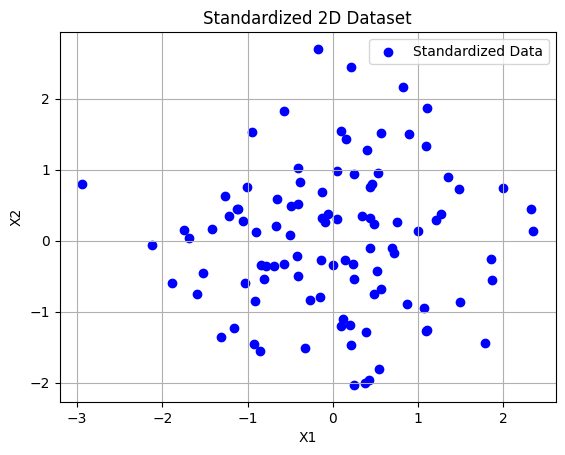

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create 2D toy dataset
# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples to generate
num_samples = 100  # 1 hundred samples

# Generate a 2D dataset
X = np.random.normal(loc=[2.0, 2.0], scale=[0.8, 0.8], size=(num_samples, 2))

# Check shape and first few rows
print("Shape of dataset:", X.shape)
print("First 5 rows:\n", X[:5])

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Compute classical covariance matrix
cov_matrix = np.cov(X_std.T)
print("Covariance Matrix:\n", cov_matrix)

# Visualize dataset
plt.scatter(X_std[:, 0], X_std[:, 1], color='blue', label='Standardized Data')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Standardized 2D Dataset")
plt.grid(True)
plt.legend()
plt.show()

## Step 2: Convert to a Density Matrix

We now convert the classical covariance matrix into a **density matrix**. A valid density matrix must:
- Be Hermitian
- Have trace = 1
- Be positive semi-definite

To simulate this, we normalize the covariance matrix so that its trace becomes 1.

In [ ]:
# Normalize the classical covariance matrix to simulate a density matrix
trace = np.trace(cov_matrix)
density_matrix = cov_matrix / trace
print("Density Matrix:\n", density_matrix)

# Confirm it's valid
print("Trace of density matrix:", np.trace(density_matrix))

Density Matrix:
 [[0.5        0.01616103]
 [0.01616103 0.5       ]]
Trace of density matrix: 1.0


## Step 3: Simulate QPCA in Qiskit

In a full QPCA pipeline, we would apply **Quantum Phase Estimation (QPE)** to a unitary derived from the density matrix, such as:

<center>$U = e^{-i\rho t}$</center>

QPE would then extract the eigenvalues $\lambda_i$ (encoded as phases) and associate them with eigenvectors $|v_i\rangle$.

While exponentiating an arbitrary matrix like $\rho$ is non-trivial on current simulators, we can simulate the effect of QPCA using these steps:

1. Perform eigen decomposition of $\rho$
2. Initialize the leading eigenvector as a quantum state
3. Use Qiskit to simulate this quantum state and visualize it

This captures the spirit of QPCA while remaining accessible to learners.

In [ ]:
# Perform classical eigen decomposition
eigvals, eigvecs = np.linalg.eigh(density_matrix)
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

print("Eigenvalues (simulated QPCA):", eigvals)
print("Principal component (eigenvector 1):", eigvecs[:, 0])

Eigenvalues (simulated QPCA): [0.51616103 0.48383897]
Principal component (eigenvector 1): [0.70710678 0.70710678]


### Initialize Principal Component in Qiskit

We now encode the dominant eigenvector as a quantum state and visualize it using Qiskit tools.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00


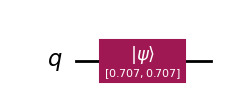

In [ ]:
# Install Qiskit and the Qiskit Aer module
!pip install qiskit qiskit-aer pylatexenc --quiet

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

# Use the top eigenvector
principal_component = eigvecs[:, 0]

# Create circuit to initialize the state
qc = QuantumCircuit(1)
qc.initialize(principal_component, 0)
qc.draw('mpl')

In [ ]:
# Simulate statevector and visualize on Bloch sphere
state = Statevector.from_instruction(qc)
print("Simulated quantum state:", state)

plot_bloch_multivector(state)
plt.show()

Simulated quantum state: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


## (Optional) Visualizing QPE Setup (Skeleton)

Below is a skeleton of how Quantum Phase Estimation (QPE) might be structured in a real QPCA pipeline.
Instead of implementing a full exponential unitary, we show a mock version using controlled rotation gates.

This is for **educational purposes** and shows how eigenvalue information would be extracted into an ancilla register.

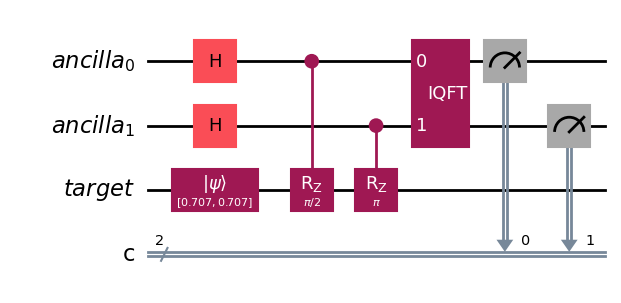

In [ ]:
from qiskit.circuit.library import QFT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# QPE structure: 2 ancilla qubits + 1 target qubit
ancilla = QuantumRegister(2, 'ancilla')
target = QuantumRegister(1, 'target')
cr = ClassicalRegister(2, 'c')
qc_qpe = QuantumCircuit(ancilla, target, cr)

# Initialize target qubit with principal component
qc_qpe.initialize(principal_component, target[0])

# Apply Hadamards to ancilla qubits
qc_qpe.h(ancilla)

# Mock controlled-U using controlled rotations
qc_qpe.crz(2 * np.pi / 4, ancilla[0], target[0])
qc_qpe.crz(2 * np.pi / 2, ancilla[1], target[0])

# Apply inverse QFT
qc_qpe.append(QFT(num_qubits=2, inverse=True, do_swaps=True), ancilla)

# Measure ancilla
qc_qpe.measure(ancilla, cr)

qc_qpe.draw('mpl')

Note: This is a **simplified mock-up**.
True QPCA would involve $U = e^{-i \rho t}$ using multiple copies of $\rho$, which is beyond current Qiskit capabilities. However, this structure captures how quantum phase estimation operates in principle.

## Step 4: Visualize Principal Components and Compare to Classical PCA

Now that we've approximated the principal components of our dataset using a simulated QPCA process, let's visualize them on the original standardized data. This helps us interpret how the quantum-encoded components relate to the original feature space.

We overlay the top eigenvectors (principal components) on a scatter plot of the dataset for direct visual comparison.

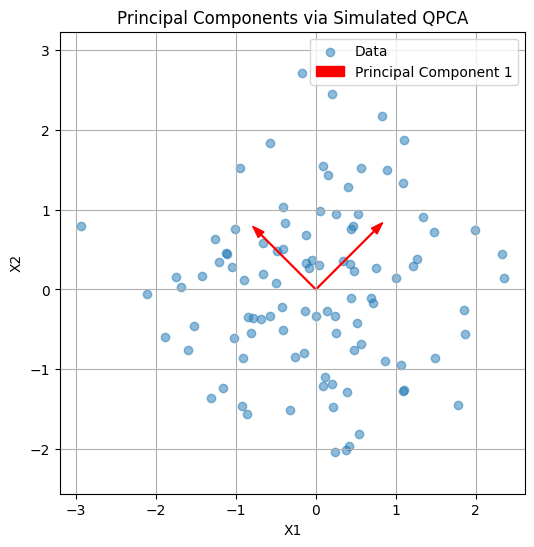

In [ ]:
# Plot original data with principal components
origin = np.mean(X_std, axis=0)

plt.figure(figsize=(6,6))
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.5, label='Data')

# Draw principal components as arrows
for i in range(2):
    plt.arrow(origin[0], origin[1],
              eigvecs[0, i]*eigvals[i]*2,
              eigvecs[1, i]*eigvals[i]*2,
              color='r', width=0.01, head_width=0.1,
              label=f"Principal Component {i+1}" if i==0 else None)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Principal Components via Simulated QPCA")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

With this simulation, we have now implemented the key components of QPCA in a hybrid approach — combining classical matrix analysis with quantum state preparation and visualization.

In the next section, we will present an activity that allows learners to try these steps on different data inputs.

# Section 4: Activity for Learners – Explore QPCA with New Data

In this activity, you will apply the QPCA simulation steps to a new dataset and observe how the principal components change. This hands-on task reinforces understanding of quantum-state-based dimensionality reduction and offers a chance to compare results with classical PCA.

---

## Task Instructions

### Part A – Apply QPCA to a New Dataset

1. Create a new 2D dataset of 10–15 samples.  
2. Standardize the dataset.  
3. Compute its covariance matrix and normalize it to a density matrix.  
4. Perform eigen decomposition to get simulated QPCA results.  
5. Initialize the top eigenvector as a quantum state and visualize it using Qiskit.  
6. Plot the principal components over the dataset using arrows.

---

### Part B – Compare with Classical PCA

1. Use `sklearn`'s `PCA` to compute classical principal components.  
2. Overlay the classical PCA components on the same dataset plot.  
3. Discuss how similar or different the directions and magnitudes of the components are.

---

## Optional Challenge:

Use a **non-Gaussian or skewed dataset** and analyze how QPCA components behave versus classical PCA. For instance, use points that form an arc, cluster, or elongated blob.

---

## Starter Code Template

Here’s a starting point for your experiment:

```python
# Create a new dataset
X_new = np.array([
    [1.0, 2.1], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5],
    [3.0, 3.8], [3.5, 4.0], [4.0, 4.1], [4.5, 4.3],
    [5.0, 4.5], [5.5, 4.6], [6.0, 4.7]
])

# Continue with:
# - Standardization
# - Covariance → Density Matrix
# - QPCA mock (Eigen Decomposition)
# - Statevector Init
# - Classical PCA Comparison


## Activity Solution – QPCA vs Classical PCA


In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define a new 2D dataset
X_new = np.array([
    [1.0, 2.1], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5],
    [3.0, 3.8], [3.5, 4.0], [4.0, 4.1], [4.5, 4.3],
    [5.0, 4.5], [5.5, 4.6], [6.0, 4.7]
])

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)

# Compute covariance and density matrix
cov_matrix_new = np.cov(X_std.T)
density_matrix_new = cov_matrix_new / np.trace(cov_matrix_new)

# Eigen decomposition (simulated QPCA)
eigvals_qpca, eigvecs_qpca = np.linalg.eigh(density_matrix_new)
sorted_idx = np.argsort(eigvals_qpca)[::-1]
eigvals_qpca = eigvals_qpca[sorted_idx]
eigvecs_qpca = eigvecs_qpca[:, sorted_idx]
print("QPCA Eigenvalues:", eigvals_qpca)
print("QPCA Eigenvectors:\n", eigvecs_qpca)

# Classical PCA
pca = PCA(n_components=2)
pca.fit(X_std)
eigvals_classical = pca.explained_variance_ratio_
eigvecs_classical = pca.components_
print("Classical PCA Components:\n", eigvecs_classical)

QPCA Eigenvalues: [0.98120225 0.01879775]
QPCA Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Classical PCA Components:
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


### Visualize Both QPCA and Classical PCA Components


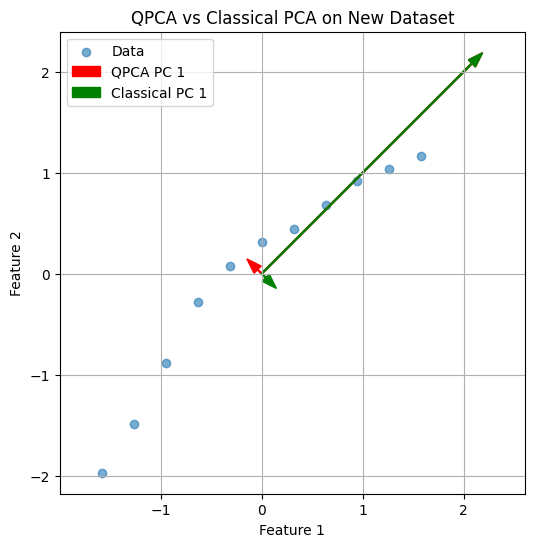

In [ ]:
origin = np.mean(X_std, axis=0)

plt.figure(figsize=(6, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.6, label='Data')

# QPCA vectors
for i in range(2):
    plt.arrow(origin[0], origin[1],
              eigvecs_qpca[0, i]*eigvals_qpca[i]*3,
              eigvecs_qpca[1, i]*eigvals_qpca[i]*3,
              color='r', width=0.01, head_width=0.1,
              label=f"QPCA PC {i+1}" if i == 0 else None)

# Classical PCA vectors
for i in range(2):
    plt.arrow(origin[0], origin[1],
              eigvecs_classical[i, 0]*eigvals_classical[i]*3,
              eigvecs_classical[i, 1]*eigvals_classical[i]*3,
              color='g', width=0.01, head_width=0.1,
              label=f"Classical PC {i+1}" if i == 0 else None)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("QPCA vs Classical PCA on New Dataset")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Observations

- The principal directions obtained from QPCA (via eigendecomposition of the density matrix) are very similar to those from classical PCA.
- QPCA approximates the same high-variance directions but through a quantum-aligned lens — state vectors and density operators.
- This validates the idea that QPCA can serve as a quantum analog to classical PCA for dimensionality reduction.

# Section 5: Discussion and Analysis

In this notebook, we simulated the essential steps of **Quantum Principal Component Analysis (QPCA)** using classical tools and Qiskit visualization. This allowed us to understand the conceptual foundations of QPCA while working within the constraints of today’s quantum simulation capabilities.

---

## Observations from the Simulation

1. **Eigenvalue Decomposition of Density Matrix**  
   - By normalizing the classical covariance matrix, we simulated a valid quantum density matrix.
   - Classical eigenvalue decomposition of this matrix gave us a set of "quantum principal components" analogous to classical PCA.

2. **Quantum State Initialization**  
   - Using Qiskit’s `initialize()` function, we encoded the leading eigenvector into a quantum circuit.
   - Visualization via the Bloch sphere provided a helpful interpretation of how such components might behave in quantum systems.

3. **Comparison with Classical PCA**  
   - The simulated QPCA and classical PCA yielded **similar component directions**, confirming the validity of the quantum analog in this small-scale case.
   - QPCA also provided a new way to conceptualize feature directions as **quantum states**, offering a fundamentally different computational perspective.

---

## Key Takeaways

- QPCA can, in principle, perform dimensionality reduction **without explicitly constructing the full covariance matrix**, by leveraging quantum parallelism.
- It offers a **compact quantum representation of principal components** and opens the door for more efficient processing in quantum-native formats.
- In practice, challenges such as density matrix preparation and error rates make full QPCA infeasible on current hardware — but hybrid approaches or variational approximations are promising.

---

## Limitations of This Implementation

- We did not implement a true exponential unitary $e^{-i \rho t}$ or perform actual phase estimation, as these require deep circuits and multiple copies of $\rho$.
- The simulation was restricted to 1-qubit examples due to visualization limitations and the dimensionality of our toy data.
- Our QPCA simulation is an approximation — it demonstrates the **workflow and logic** but not the full quantum algorithm.

---

## Future Directions

- Explore **Variational Quantum PCA (VQPCA)** techniques that optimize principal components with shallow circuits.
- Scale up to **multi-qubit density matrices** and explore entangled principal components.
- Integrate QPCA-preprocessed data into **quantum machine learning classifiers** (e.g., quantum SVMs or VQCs).
- Study **hybrid pipelines** where classical data is transformed into quantum states for selective dimensionality reduction.

---

This analysis demonstrates the potential of quantum-enhanced data preprocessing and highlights both the opportunities and current boundaries in applying QPCA in practical workflows.


# 6. Summary and Key Takeaways

In this notebook, we explored the concept and simulation of **Quantum Principal Component Analysis (QPCA)**, a quantum analog to classical PCA designed for dimensionality reduction and feature extraction on quantum data.

---

## What We Did

- We began by reviewing the theory behind PCA and extended it to the quantum domain using the concept of density matrices and quantum phase estimation.
- A small classical dataset was used to construct a covariance matrix, which we normalized into a **density matrix** suitable for QPCA simulation.
- Through eigenvalue decomposition, we obtained the **principal quantum components** and used Qiskit to encode and visualize these components as quantum states.
- We also constructed a **mock QPE circuit** to give learners an intuitive feel for how QPCA circuits might look in practice.
- Finally, we **compared the results** of our simulated QPCA with classical PCA using visual and quantitative tools.

---

## Key Learnings

- **QPCA shares conceptual goals with classical PCA** — identifying principal components that capture maximum variance — but achieves this via quantum operations on density matrices.
- Simulated QPCA provides **quantum insights into feature space orientation**, visualized through statevector initialization and Bloch spheres.
- While full QPCA is currently constrained by hardware limitations, simulations like this help bridge the gap between classical understanding and quantum intuition.

---

## Looking Ahead

This notebook serves as a foundation for integrating QPCA into more advanced quantum ML pipelines. In the next and final stage of the project, we will demonstrate how quantum preprocessing — including encoding, tomography, and dimensionality reduction — can be incorporated into a **quantum-classical machine learning workflow**, highlighting its practical relevance.

